# Books Read in 2020

## Prep
Imports and set variables

In [1]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.style as style
%matplotlib inline

In [2]:
style.use('seaborn')
pd.set_option('mode.chained_assignment', None)
YEAR = 2020
JAN1 = '1/1/{}'.format(YEAR)

## Get Data
Export bookshelves from Goodreads as a CSV file named books.csv and read it in.

Go to https://www.goodreads.com/review/import and click "Export Library". Rename to **books.csv**.

In [3]:
books = pd.read_csv('books.csv')
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Prep Data
Fix data issues specific to current year

In [4]:
books.at[books['Title'].str.startswith('The Ghost Map'), 'Date Read'] = '12/21/2019'
books.at[books['Title'].str.startswith('Exhalation'), 'Date Read'] = '10/16/2019'
books.at[books['Title'].str.startswith('Why We Sleep'), 'Date Read'] = '12/8/2019'
books.at[books['Title'].str.startswith('High Fidelity'), 'Date Read'] = '4/21/2020'
books.at[books['Title'].str.startswith('The Ocean at the End of the Lane'), 'Date Read'] = '4/21/2020'
books.at[books['Title'].str.startswith('Conscious'), 'Original Publication Year'] = 2019
books.at[books['Title'].str.startswith('A Series of Fortunate Events'), 'Original Publication Year'] = 2020
books.at[books['Title'] == 'Chances Are . . .', 'Title'] = 'Chances Are...'
books['Date Read'] = pd.to_datetime(books['Date Read'])

Add Start Dates to books. The start date is in the Goodreads database, but it is not in the Export file. So, these dates need to be added manually. To simplify this, a start dict is created which can be copy/pasted as part of the next step. 

In [5]:
print('{',sep='')
for bk in books[(books['Date Read'] >= JAN1) | 
                (books['Exclusive Shelf'] == 
                 'currently-reading')]['Title'].values:
    print ('"{}":"{}",'.format(bk, JAN1))
print('}')

{
"Speak No Evil":"1/1/2020",
"The Fall of Berlin 1945":"1/1/2020",
"Mary Turner and the Memory of Lynching":"1/1/2020",
"The Practicing Stoic: A Philosophical User's Manual":"1/1/2020",
"Chances Are...":"1/1/2020",
"A Series of Fortunate Events: Chance and the Making of the Planet, Life, and You":"1/1/2020",
"On Having No Head: Zen and the Rediscovery of the Obvious":"1/1/2020",
"White Flight: Atlanta and the Making of Modern Conservatism":"1/1/2020",
"The Unicorn Project: A Novel about Digital Disruption, Redshirts, and Overthrowing the Ancient Powerful Order":"1/1/2020",
"The Story of More: How We Got to Climate Change and Where to Go from Here":"1/1/2020",
"Good Reasons for Bad Feelings: Insights from the Frontier of Evolutionary Psychiatry":"1/1/2020",
"Suggestible You: The Curious Science of Your Brain's Ability to Deceive, Transform, and Heal":"1/1/2020",
"The Phoenix Project: A Novel about IT, DevOps, and Helping Your Business Win":"1/1/2020",
"Catch-22":"1/1/2020",
"The Right 

Copy the above text and paste it below. Set it equal to **start_dates**. Replace the "1/1/YY" with the correct start dates. This is required because the start date is not in the downloaded CSV. It must be manually retrieved. This can be done by going to the Read list and via settings adding a column for Date Started. 

In [6]:
start_dates = {
"Mary Turner and the Memory of Lynching":"10/7/2020",
"The Practicing Stoic: A Philosophical User's Manual":"12/27/2020",
"Chances Are...":"12/12/2020",
"A Series of Fortunate Events: Chance and the Making of the Planet, Life, and You":"12/21/2020",
"On Having No Head: Zen and the Rediscovery of the Obvious":"12/21/2020",
"White Flight: Atlanta and the Making of Modern Conservatism":"3/16/2020",
"The Unicorn Project: A Novel about Digital Disruption, Redshirts, and Overthrowing the Ancient Powerful Order":"10/24/2020",
"The Story of More: How We Got to Climate Change and Where to Go from Here":"6/17/2020",
"Good Reasons for Bad Feelings: Insights from the Frontier of Evolutionary Psychiatry":"2/23/2020",
"Suggestible You: The Curious Science of Your Brain's Ability to Deceive, Transform, and Heal":"10/4/2020",
"The Phoenix Project: A Novel about IT, DevOps, and Helping Your Business Win":"10/10/2020",
"Catch-22":"8/1/2020", 
"The Right Stuff":"5/8/2020",
"Speak No Evil":"6/14/2020",
"Liar":"5/31/2020",
"The Splendid and the Vile: A Saga of Churchill, Family, and Defiance During the Blitz":"4/21/2020",
"This is Where I Leave You":"5/23/2020",
"So You've Been Publicly Shamed":"4/30/2020",
"High Fidelity":"4/21/2020",
"The Ocean at the End of the Lane":"3/28/2020",
"Motherless Brooklyn":"3/5/2020",
"The Life You Can Save: Acting Now to End World Poverty":"2/2/2020",
"The Underground Railroad":"2/15/2020",
"Sing, Unburied, Sing":"8/4/2019",
"He Calls Me By Lightning: The Life of Caliph Washington and the Forgotten Saga of Jim Crow, Southern Justice, and the Death Penalty":"1/28/2020",
"Lab Girl":"1/19/2020",
"Say Nothing: A True Story of Murder and Memory in Northern Ireland":"1/1/2020",
}

Verify that you filled in all of the dates

In [7]:
all_updated = True
for t, d in start_dates.items():
    if d == JAN1:
        print('Unchanged: ', t)
        all_updated = False
if all_updated:
    print('All start dates have been updated.')

Unchanged:  Say Nothing: A True Story of Murder and Memory in Northern Ireland


Populate the Date Started column.

In [8]:
books['Date Started'] = books['Title'].map(start_dates)
books['Date Started'] = pd.to_datetime(books['Date Started'])

Remove unnecessary columns

In [9]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id', 'My Review', 
          'Spoiler', 'Private Notes','Recommended For', 'Recommended By', 
          'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
          'Condition', 'Condition Description', 'BCID'):
    try:
        del books[c]
    except:
        pass

## Filter Books
Downselect list of books that were either finished in current year or were started in current year and not finished. 

In [10]:
date_columns = ['Date Read', 'Date Added', 
                'Date Started']
for c in date_columns:
    books[c] = pd.to_datetime(books[c])

In [11]:
books = books.dropna(subset=['Date Read', 'Date Started'], how='all')

In [12]:
books = books[(books['Date Read'] >= JAN1)
              | ((books['Exclusive Shelf'] =='currently-reading')
                 & (books['Date Started'] >= JAN1))]

Manual removal. This is where can manually remove books you do not want in the plots.

In [13]:
to_remove = ['The Fall of Berlin 1945']
books = books.drop(books[books.Title.isin(to_remove)].index)

In [14]:
books['Finished'] = books['Date Read'].notnull()
# if book has not been finished, set Date Read to Dec 31. This is done for plotting purposes. 
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(YEAR,12,31))

## List the Books

In [15]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_['Original Publication Year'] = books_['Original Publication Year'].fillna(0)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%i)'%(row['Title'],row['Author'],row['Original Publication Year']))

Say Nothing: A True Story of Murder and Memory in Northern Ireland by Patrick Radden Keefe (2018)
Lab Girl by Hope Jahren (2016)
He Calls Me By Lightning: The Life of Caliph Washington and the Forgotten Saga of Jim Crow, Southern Justice, and the Death Penalty by S. Jonathan Bass (2017)
Sing, Unburied, Sing by Jesmyn Ward (2017)
The Underground Railroad by Colson Whitehead (2016)
The Life You Can Save: Acting Now to End World Poverty by Peter Singer (2009)
Motherless Brooklyn by Jonathan Lethem (1999)
The Ocean at the End of the Lane by Neil Gaiman (2013)
High Fidelity by Nick Hornby (1995)
So You've Been Publicly Shamed by Jon Ronson (2015)
This is Where I Leave You by Jonathan Tropper (2003)
The Splendid and the Vile: A Saga of Churchill, Family, and Defiance During the Blitz by Erik Larson (2020)
Liar by Rob Roberge (2016)
Speak No Evil by Uzodinma Iweala (2018)
The Right Stuff by Tom Wolfe (1979)
Catch-22 by Joseph Heller (1961)
The Phoenix Project: A Novel about IT, DevOps, and He

## Book Order for Covers
The book covers are ordered by finish date starting with the most recently finished.
Below is the oder list (needed for `Cover Art Prep.ipynb`)

In [16]:
books[books.Finished == True].sort_values('Date Read', ascending=False).reset_index()['Title'].to_frame()

,Title
0,Mary Turner and the Memory of Lynching
1,Chances Are...
2,A Series of Fortunate Events: Chance and the M...
3,On Having No Head: Zen and the Rediscovery of ...
4,White Flight: Atlanta and the Making of Modern...
5,The Unicorn Project: A Novel about Digital Dis...
6,The Story of More: How We Got to Climate Chang...
7,Good Reasons for Bad Feelings: Insights from t...
8,Suggestible You: The Curious Science of Your B...
9,"The Phoenix Project: A Novel about IT, DevOps,..."


## Calculations
Calculate Time to Read

In [17]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)
# if book has not been finished then set Time to Read to 0 days.
books['Time to Read'] = books['Time to Read'].where(books['Finished'] == True, datetime.timedelta(days=0))

Calculate Pages Read per Day

In [18]:
books['Pages per Day'] = (books['Number of Pages'] / 
                          [x.days for x in books['Time to Read']])

Create a short title for some of the plots.

In [19]:
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])
books['Title (short)'] = books['Title (short)'].str.replace(r" \(.*\)","")

Sort books

In [20]:
books.sort_values(by='Date Started',ascending=False,inplace=True)

## Some Stats

In [21]:
print(f"In total: {len(books[books['Finished'] == True])} books, {books.loc[books['Finished'] == True, 'Number of Pages'].sum():,.0f} pages.")
print(f"Avg: {books.loc[books['Finished'] == True, 'Number of Pages'].sum() / len(books[books['Finished'] == True]):,.0f} pages")

In total: 26 books, 8,487 pages.
Avg: 326 pages


## Plotting

In [22]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color, False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(YEAR,1,1)] = "#55A868"
clist = list(s)
ylabel_colors = ['black' if f else 'gray' for f in books['Finished']]

### Books Across the Year

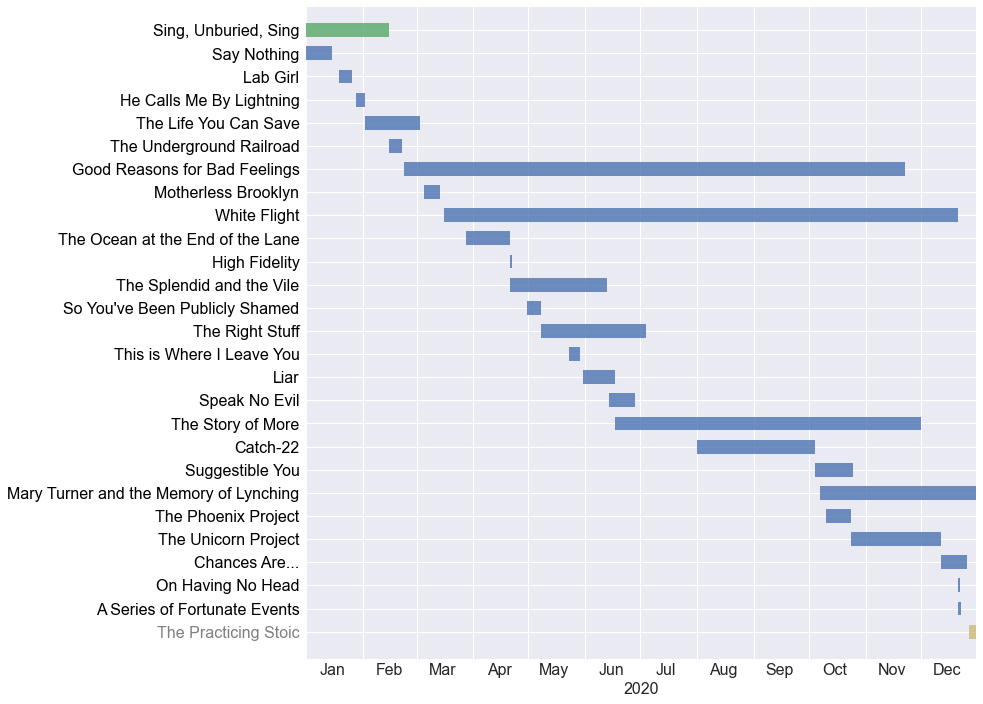

In [23]:
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(YEAR, 1, 1):
        date = datetime.datetime(YEAR, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen = len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, max(end_date - start_date, 1), label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos, ylabels)
plt.setp(labelsy, fontname="Arial", fontsize = 16)
ax.set_ylim(bottom=-0.1, top=ilen*0.5+0.5)
[t.set_color(c) for c, t in zip(ylabel_colors, ax.yaxis.get_ticklabels())]

ax.xaxis_date()
ax.set_xlim(left=_create_date(datetime.datetime(YEAR, 1, 1)),
           right=_create_date(datetime.datetime(YEAR, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# plt.title('{} Reading'.format(YEAR), fontname="Arial", fontsize=20)
plt.title(None)
plt.xlabel(YEAR, fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 
    
plt.savefig('books_timeline_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Book Ratings

Average Personal Goodread Rating: 0.7692307692307693
Average Site Goodread Rating: 4.030384615384616


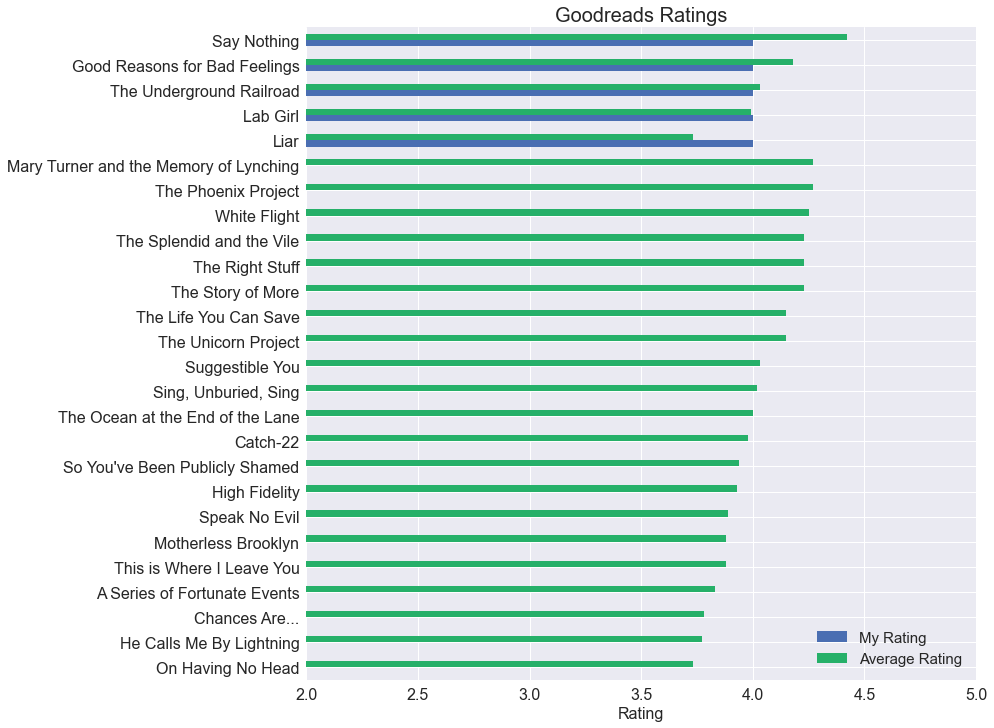

In [24]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by=['My Rating',
                                                                     'Average Rating'],ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',
                                                 xlim=(2,5),
                                                 figsize=(12,12),
                                                 fontsize=16,
                                                 color=('#4A6EB2', '#26B069'))
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating', fontsize=16)
plt.title('Goodreads Ratings', fontsize=20);
mpl.rcParams['legend.fontsize'] = 'large'
print ('Average Personal Goodread Rating:',books_['My Rating'].mean())
print ('Average Site Goodread Rating:',books_['Average Rating'].mean())
plt.legend(fontsize=15)

plt.savefig('ratings_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Number of Pages

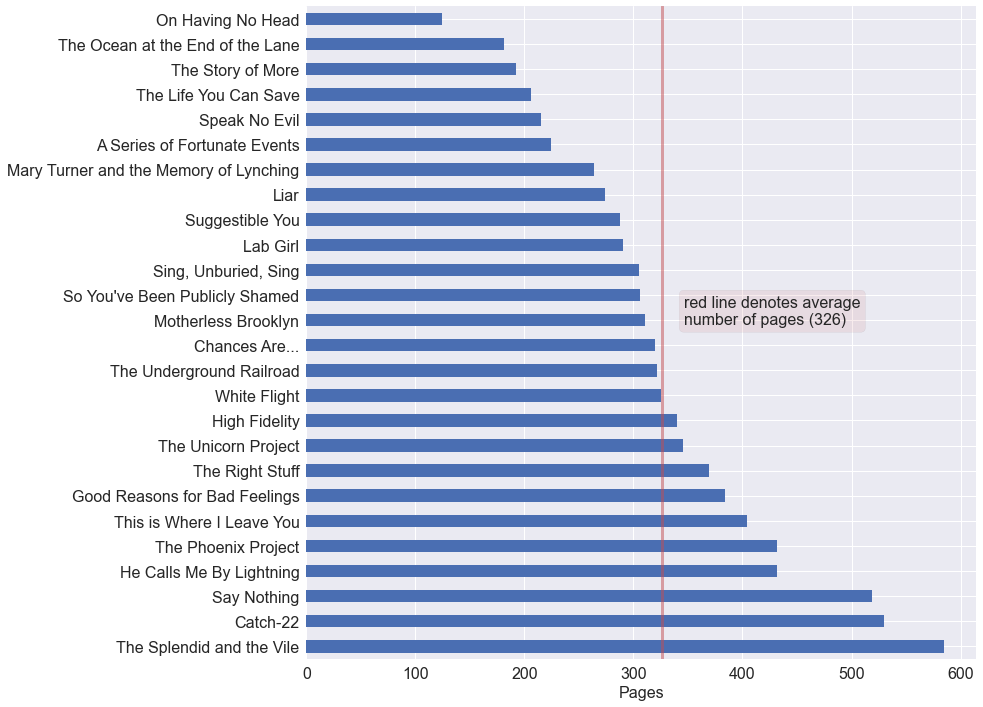

In [25]:
books_ = books[books['Finished'] == True]
avg = books_['Number of Pages'].mean()
books_ = books_.set_index('Title (short)')
ax = books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                                 title='Number of Pages',
                                                                 figsize=(12,12),
                                                                 fontsize=16,
                                                                 color='#4A6EB2')
ax.yaxis.label.set_visible(False)

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+20, 14, 'red line denotes average\nnumber of pages ({:.0f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontname="Arial", fontsize=16)
plt.xlabel('Pages', fontsize=16)
# plt.title('Number of Pages', fontname="Arial", fontsize=20)
plt.title(None)

plt.savefig('num_pages_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

In [26]:
print(f'This year you read {len(books_)} books with a total page count of {books_["Number of Pages"].sum():,.0f} and and average ' +
      f'number of pages of {books_["Number of Pages"].mean():,.1f} per book.')

This year you read 26 books with a total page count of 8,487 and and average number of pages of 326.4 per book.


<ipython-input-27-246bc82ce99f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);


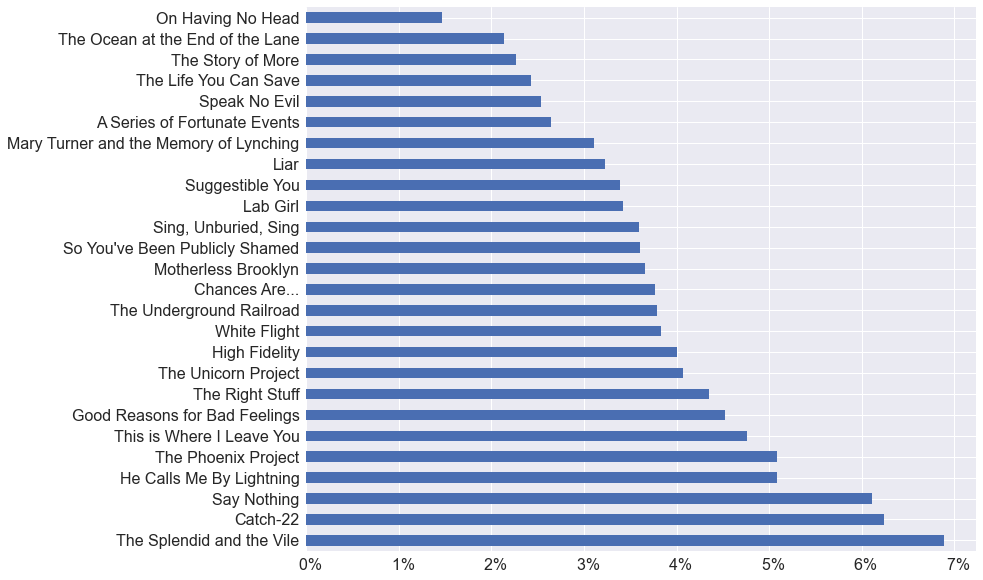

In [27]:
# Note: if the UserWarning is explained here 
# https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator

books_ = books[books['Finished'] == True]

books_.loc[:, 'Percent'] = books_['Number of Pages'] / books_['Number of Pages'].sum()
books_ = books_.set_index('Title (short)')
ax = books_['Percent'].sort_values(ascending=False).plot(kind='barh', 
                                                         figsize=(12,10),
                                                         fontsize=16,
                                                         color='#4A6EB2')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

Average Number of Pages over Year: 23.252054794520546


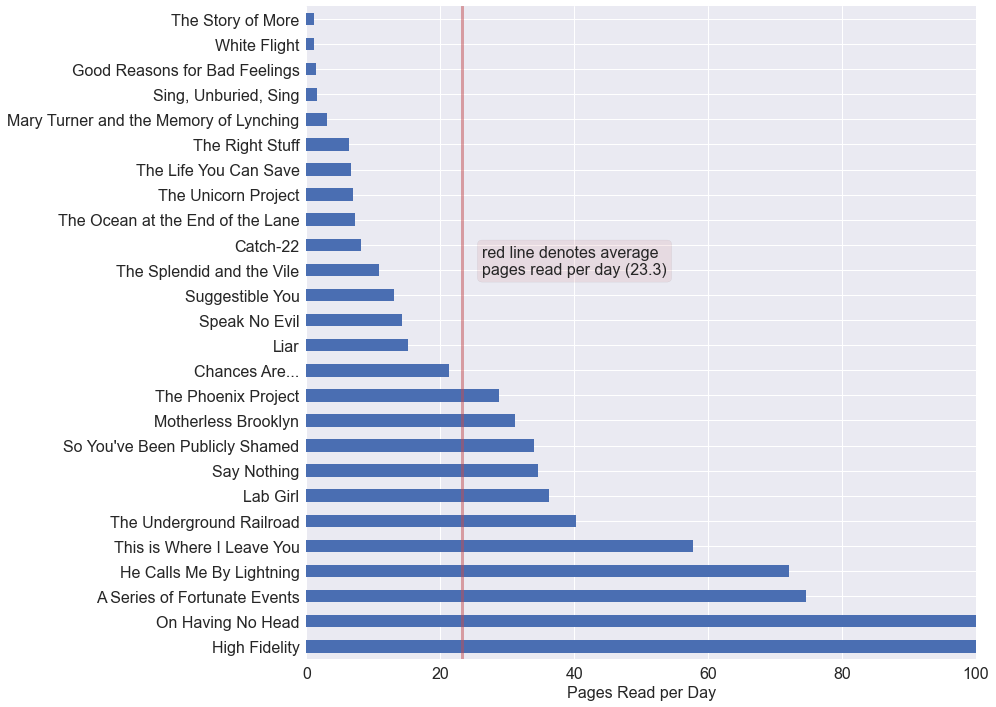

In [28]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               xlim=(0,100),
                                                               figsize=(12,12),
                                                               fontsize=16,
                                                               color='#4A6EB2')
ax.yaxis.label.set_visible(False)
# plt.title('Reading Rate: Pages Read per Day', fontsize=20)
plt.title(None)
# BELOW code used if one is "off the charts" and the x scale needs to be set such that one is too long
# mpd = books_.loc[XXX,'Pages per Day']
# mpd = str(mpd)+'->'
# ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
#         verticalalignment='top',horizontalalignment='left')

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+3, 16, 'red line denotes average\npages read per day ({:.1f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
ax.set_xlabel('Pages Read per Day', fontsize=16)
print ('Average Number of Pages over Year:',avg)

plt.savefig('pages_per_day_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Publication Dates

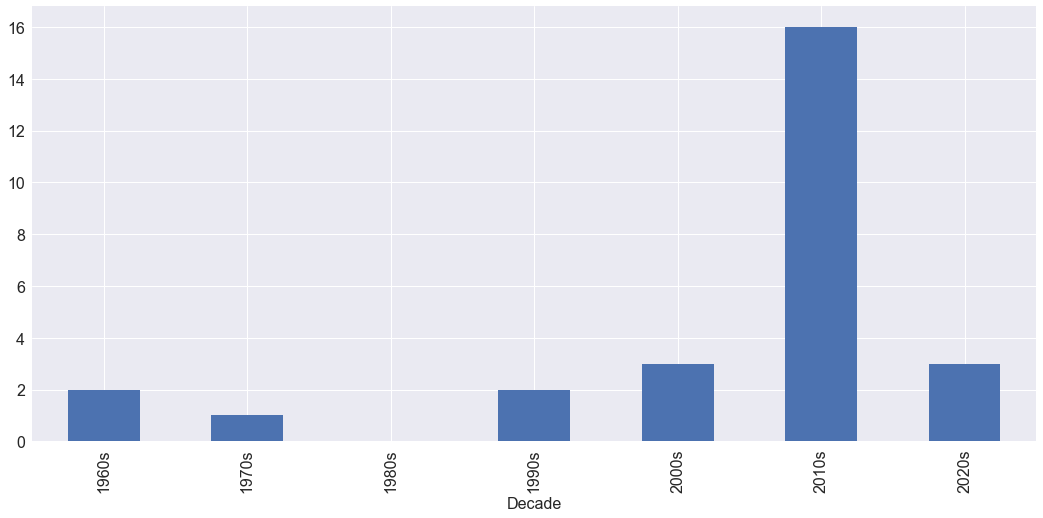

In [29]:
books_ = books[books['Finished'] == True]
books_['Original Publication Year'] = books_['Original Publication Year'].astype(int)
decade = 10 * (books['Original Publication Year'] // 10)
decade = decade.astype(int).astype(str) + 's'
decade.name = 'Decade'
published = books.groupby(decade).count()['Title']
published.name = 'Count'

all_years = list(range(books_['Original Publication Year'].min(), books_['Original Publication Year'].max() + 1))
all_decades = []
for y in all_years:
    decade = 10 * (y // 10)
    all_decades.append(decade)
all_decades = list(set(all_decades))
all_decades = [str(d) + 's' for d in sorted(all_decades)]

published = published.reindex(all_decades).fillna(0)

ax = published.plot(kind='bar',figsize=(18,8),fontsize=14)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.set_xlabel('Decade', fontsize=16);

## Some Stats
Average Number of Pages per Day over Year

In [30]:
# prorate carry-over books
books_ = books[books['Finished'] == True]
carry_overs = books_[books_['Date Started'] < JAN1]
new_start = datetime.datetime(YEAR,1,1)

carry_overs.loc[:,'Number of Pages'] = (carry_overs['Number of Pages'] * 
                                        (((carry_overs['Date Read'] - 
                                           new_start).map(lambda x: x.days) +1) / 
                                         ((carry_overs['Date Read'] - 
                                           carry_overs['Date Started']).map(lambda x: x.days)+1))).values
books_['Number of Pages'].update(carry_overs['Number of Pages'])
print('Average Number of Pages per Day over Year:', books_['Number of Pages'].sum()/365)

Average Number of Pages per Day over Year: 22.61255241822757
